### Student Information
Name:林孟翰

Student ID:108061529

GitHub ID:108061529

Kaggle name: 108061529

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)
[Snapshot](img/pic1.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM19-Lab2-Master Repo](https://github.com/EvaArevalo/DM19-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/179d01d4dd984fc5ac45a894822479dd) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Nov. 23rd 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM19-Lab2-Homework](https://github.com/EvaArevalo/DM19-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 26th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

## Part 1: Lab Exercises
---

## 1. Data Preparation

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [36]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [37]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [38]:
%matplotlib inline
import numpy as np
# Use count vectorizer to find word frequency
from sklearn.feature_extraction.text import CountVectorizer

# Used to plot word frequency only, fit_transform
# with both train and test sets
count_vect1 = CountVectorizer()
train_counts = count_vect1.fit_transform(train_df.text)
count_vect2 = CountVectorizer()
test_counts = count_vect2.fit_transform(test_df.text)

# Calculate term frequencies 
train_tf = np.asarray(train_counts.sum(axis=0))[0]
test_tf = np.asarray(test_counts.sum(axis=0))[0]

print(max(train_tf))
print(test_tf)

1736
[1 1 2 ... 1 1 1]


In [39]:
# Sort the term frequency and return its index with argsort, reverse the sequence 
# because argsort gives index starting from the smallest element in the array.
# train_rank_idx = train_tf.argsort()[(-len(train_tf)):][::-1]
# test_rank_idx = test_tf.argsort()[(-len(test_tf)):][::-1]
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# define a function that plots the frequency plot sorted by frequency
def plot_sorted_freq_curve(dataset, term_frequencies, feature_names, top_n):
    # Sort the term frequency and return its index with argsort,
    # reverse the sequence because argsort gives index starting
    # from the smallest element in the array.
    X_count_rank_idx = term_frequencies.argsort()[(-len(term_frequencies)):][::-1]
    
    fig = go.Figure(                                # plotly gragh object
        data=[go.Bar(y=term_frequencies[X_count_rank_idx][0:top_n])],
        layout_title_text="Term Frequency " + dataset
    )
    fig.update_yaxes(range=[0,max(term_frequencies)+100])
    fig.update_xaxes(range=[-0.5, top_n+0.5],       # show first 100, move plot to see the rest
                     tickangle=270,
                     ticktext=np.array(feature_names)[X_count_rank_idx][0:top_n],
                     tickvals=np.arange(0,len(term_frequencies[X_count_rank_idx][0:top_n]),1),
                     tickfont=dict(family='serif', color='black', size=10))                             
    fig.show()
    # print out top words
    print('Top '+str(top_n)+' words: ',np.array(feature_names)[X_count_rank_idx][0:top_n])
    
    return np.array(feature_names)[X_count_rank_idx][0:top_n] # return top ranked word for later use

In [40]:
_ = plot_sorted_freq_curve('Train', train_tf, count_vect1.get_feature_names(), 30)
_ = plot_sorted_freq_curve('Test', test_tf, count_vect2.get_feature_names(), 30)

Top 30 words:  ['the' 'to' 'and' 'you' 'of' 'is' 'it' 'in' 'that' 'my' 'for' 'on' 'be'
 'me' 'this' 'so' 'have' 'not' 'just' 'but' 'with' 'at' 'can' 'like' 'all'
 'are' 'your' 'was' 'when' 'if']


Top 30 words:  ['the' 'to' 'and' 'it' 'of' 'you' 'is' 'in' 'for' 'that' 'my' 'on' 'be'
 'me' 'was' 'so' 'can' 'at' 'have' 'all' 'just' 'are' 'with' 'but' 'get'
 'your' 'up' 'this' 'like' 'not']


---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# build analyzers (tfidf)
train_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
train_tfidf = train_1000.fit_transform(train_df.text)

## check dimension
train_tfidf.shape

(3613, 1000)

In [8]:
# observe some feature names
feature_names_1000 = train_1000.get_feature_names()
feature_names_1000[100:110]

['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc', 'bday']

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

![title](img/cfm.png)

From the confusion matrix, we can easily observe how our model performs on each class. The diagonal terms represent the number of correct predictions for each class, and the other terms either represent false positives or false negatives. We can also see the distribution of the predictions. For instance, out of all 'anger' tweets, 15 are predicted as 'fear', 5 are predicted as 'joy', 9 are predicted as sadness. Furthermore, we can evaluate the performance with different metrics(UAR, recall, precision, etc.) when the confusion matrix is available. 

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [9]:
# Answer here

# Extract the same set of features for Naive Bayes classifier
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [10]:
from sklearn.naive_bayes import MultinomialNB
# training
MNB_model = MultinomialNB()
MNB_model.fit(X_train, y_train)

## predict!
y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.72


In [11]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.83      0.78       110
         joy       0.76      0.71      0.73        79
     sadness       0.65      0.64      0.64        74

    accuracy                           0.72       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.72      0.72      0.72       347



In [12]:
## check the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 14  5 10]
 [ 6 91  5  8]
 [ 9  7 56  7]
 [ 8 11  8 47]]


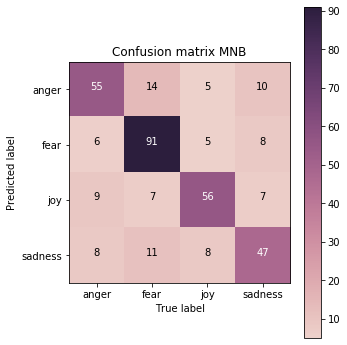

In [13]:
# plot your confusion matrix
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix MNB')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

![title](img/dt_mnb.png)

### Answer here
Above are the snapshots of the results of both models. Decision tree performs much better than Naive Bayes on the training data, but Naive Bayes outperforms Decision tree on the testing data. In the test set, Naive Bayes performs slightly better than Decision tree on 'anger', 'joy', and 'sadness', and performs a lot better on 'fear'.

Decision tree models tend to overfit the training data if not pruned, and may grow to be very complex while training complicated datasets. By comparing the training and testing accuracies, we can infer that overfitting occurs for the Decision tree model.

Naive bayes model performs a lot better on 'fear'. The reason for this could be that it learns the prior probabilities for each class while the Decision tree makes no assumptions on distribution of data. We can see from the distribution that the percentage of 'fear' instances is highest in both training and testing data.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

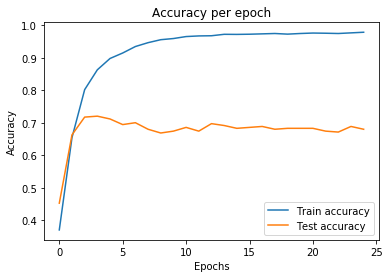

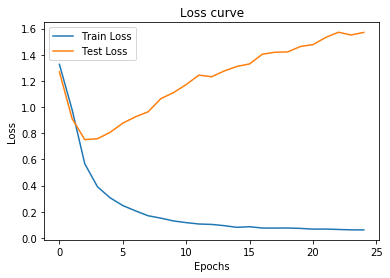

In [14]:
training_log = pd.read_csv('logs/training_log.csv')

plt.figure(0)
plt.title('Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_log.accuracy, label = 'Train accuracy')
plt.plot(training_log.val_accuracy, label = 'Test accuracy')
plt.legend()

plt.figure(1)
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(training_log.loss, label = 'Train Loss')
plt.plot(training_log.val_loss, label = 'Test Loss')
plt.legend()

While the train accuracy almost reaches 1 after 5 epochs, test accuracy remains around 0.7. Test loss stops decreasing and starts increasing after few epochs while train loss keeps decreasing. This is the case of overfitting. The model fits the training data too well and ends up with a very high variance after training for 25 epochs

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

### Ans
Since they are word 'vectors', we can sum the word vectors of each sentence(sequence of words)to aquire a vector that represents the sentence. Point to point multiplication and averaging are also possible methods. After summation or averaging the word vectors, each sentence is represented by a 1-dimension vector, and can be used as the training data for ML or NN models.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [15]:
from gensim.models import KeyedVectors
###################################################################################
## Note: this model is very huge, this will take some time ...
model_path = "D:/DMLAB/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')
###################################################################################

word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]      
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

load ok
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irrita

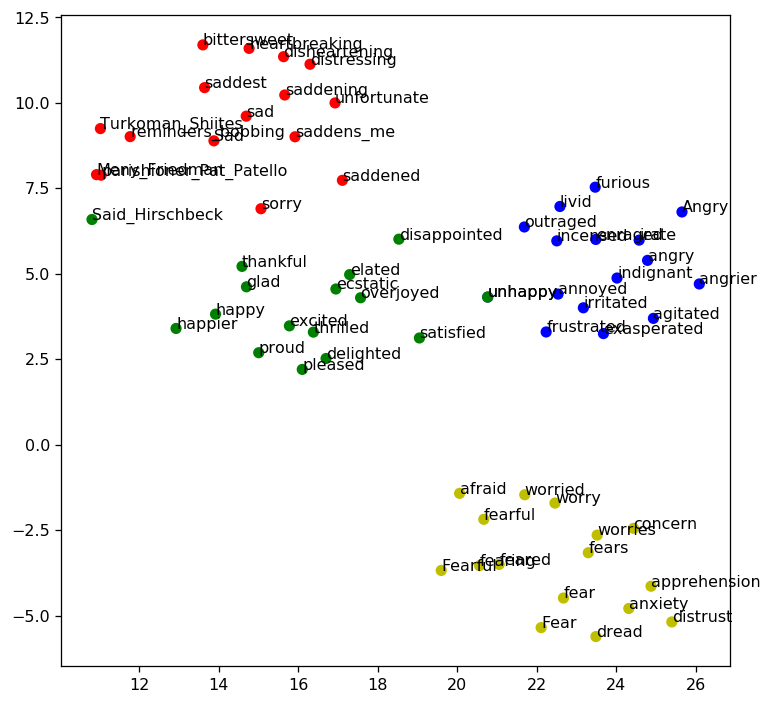

In [18]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

## Part 2: Kaggle competition
---

## 1. Data preparation

### 1.1 Convert the data into dataframes and save

#### From the "Data" page on the Kaggle Website, we can see that there are more than 1 million tweets in this twitter dataset. My plan is to tidy the dataset first and append emotion label to them, so that it will be easier to utilize them afterwards.

#### Part 1

In this part, I convert the dataset into a dictionary which has tweet_id as the key and other features as values. This will be easier for me to separate train/test set later.

In [1]:
import json

'''
Read the json file, append each dictionary to "all_",

'''
file = open(r'D:\DMLAB\dm19-lab2-nthu\tweets_DM.json', 'r', encoding='utf-8')
all_ = []
for line in file.readlines():
    dic = json.loads(line)
    all_.append(dic)


'''
Print out a dictionary
'''
dic

{'_score': 360,
 '_index': 'hashtag_tweets',
 '_source': {'tweet': {'hashtags': ['Sundayvibes'],
   'tweet_id': '0x34be8c',
   'text': 'Blessed to be living #Sundayvibes <LH>'}},
 '_crawldate': '2016-11-16 01:40:07',
 '_type': 'tweets'}

In [2]:
'''
Append all tweets and other features into corresponding lists
'''
ids = []
text = []
hashtags = []
score = []
date = []
index = []
#type_ = []
for i in range(len(all_)):
    ids.append(all_[i]['_source']['tweet']['tweet_id'])
    hashtags.append(all_[i]['_source']['tweet']['hashtags'])
    text.append(all_[i]['_source']['tweet']['text'])
    score.append(all_[i]['_score'])
    date.append(all_[i]['_crawldate'])
    index.append(all_[i]['_index'])
    
'''
Convert the data into a more intuitive format
Format: dict({ids[i]: [hashtags[i], text[i], score[i], date[i], index[i]]})
'''
all_dict = dict()
for i in range(len(all_)):
    all_dict.update({ids[i]: [hashtags[i], text[i], score[i], date[i], index[i]]})
    
'''
Print an all_dict example
'''
print(ids[0])
print(all_dict[ids[0]])


'''
Save the all_dict file
'''
'''
import pickle
file = open('kaggle_data/all_tweets.pkl', 'wb')
pickle.dump(all_dict, file)
file.close()
'''

0x376b20
[['Snapchat'], 'People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that\'s <LH>', 391, '2015-05-23 11:42:47', 'hashtag_tweets']


#### Part 2

Separate the training set from the dataset and append tweet emotion. Save the training set dataframe as pickle file.

In [4]:
import pickle
import pandas as pd
from tqdm import tqdm
'''
Read data_identification and emotion file.
'''
ident = pd.read_csv(r'D:\DMLAB\dm19-lab2-nthu\data_identification.csv')
#with open('all_tweets.pkl', 'rb') as file:
#   all_dict = pickle.load(file)
emo_df = pd.read_csv(r'D:\DMLAB\dm19-lab2-nthu\emotion.csv')

'''
Separate the training set from the dataset.
'''
ids = []
hashtags = []
text = []
score = []
date = []
index = []
for i in tqdm(range(ident.shape[0])):
    if ident.identification[i]=='train':
        ids.append(ident.tweet_id[i])
        hashtags.append(all_dict[ident.tweet_id[i]][0])
        text.append(all_dict[ident.tweet_id[i]][1])
        score.append(all_dict[ident.tweet_id[i]][2])
        date.append(all_dict[ident.tweet_id[i]][3])
        index.append(all_dict[ident.tweet_id[i]][4])
df = pd.DataFrame()
df['id'] = ids
df['hashtags'] = hashtags
df['text'] = text
df['score'] = score
df['date'] = date
df['index'] = index

'''
Contruct a emotion dictionary for training set
Format: {tweet_id: emotion}
'''
emo_dict = dict()
for i in range(emo_df.shape[0]):
    emo_dict.update({emo_df.tweet_id[i]: emo_df.emotion[i]})
    
'''
Use the emotion dictionary to
append the emotion label to the training set.
Store the training tweets
'''
emos = []
for i in range(len(df.id)):
    emos.append(emo_dict[df.id[i]])
df['emotion'] = emos
#df.to_pickle('kaggle_data/train_tweets.pkl')

df.head()

100%|██████████████████████████████████████████████████████████████████████| 1867535/1867535 [04:12<00:00, 7402.21it/s]


,id,hashtags,text,score,date,index,emotion
0,0x29e452,[],Huge Respect🖒 @JohnnyVegasReal talking about l...,809,2015-01-17 03:07:03,hashtag_tweets,joy
1,0x2b3819,"[spateradio, app]",Yoooo we hit all our monthly goals with the ne...,808,2016-07-02 09:34:06,hashtag_tweets,joy
2,0x2a2acc,[],@KIDSNTS @PICU_BCH @uhbcomms @BWCHBoss Well do...,16,2016-08-15 18:18:39,hashtag_tweets,trust
3,0x2a8830,"[PUBG, GamersUnite, twitch, BeHealthy, StayPos...",Come join @ambushman27 on #PUBG while he striv...,768,2017-02-11 08:49:46,hashtag_tweets,joy
4,0x20b21d,"[strength, bones, God]",@fanshixieen2014 Blessings!My #strength little...,70,2016-11-23 05:37:10,hashtag_tweets,anticipation


#### Part 3

Separate the test set from the dataset and make sure the test set has the same order as the Sample Submission file. Save the test set dataframe as pickle file.

In [41]:
'''
Construct the test set dataframe according to 
the order in the sample submission file.
'''
sub = pd.read_csv(r'D:\DMLAB\dm19-lab2-nthu\sampleSubmission.csv')
with open('kaggle_data/all_tweets.pkl', 'rb') as file:
    all_dict = pickle.load(file)

ids = []
hashtags = []
text = []
score = []
date = []
index = []
for i in tqdm(range(sub.shape[0])):
    ids.append(sub.id[i])
    hashtags.append(all_dict[sub.id[i]][0])
    text.append(all_dict[sub.id[i]][1])
    score.append(all_dict[sub.id[i]][2])
    date.append(all_dict[sub.id[i]][3])
    index.append(all_dict[sub.id[i]][4])
df = pd.DataFrame()
df['id'] = ids
df['hashtags'] = hashtags
df['text'] = text
df['score'] = score
df['date'] = date
df['index'] = index
#df.to_pickle('kaggle_data/test_public_tweets.pkl')
df.head()

100%|███████████████████████████████████████████████████████████████████████| 411972/411972 [00:29<00:00, 13839.21it/s]


,id,hashtags,text,score,date,index
0,0x2c7743,"[loyal, real]",When your friends offer to bring you food 😭💘 #...,685,2015-01-16 04:51:22,hashtag_tweets
1,0x2c1eed,[],I've never let any money problems stop me.. I ...,646,2016-06-15 16:57:50,hashtag_tweets
2,0x2826ea,[],@KurtSchlichter Being a Hobby Historian Chelse...,172,2015-05-20 04:55:48,hashtag_tweets
3,0x356d9a,"[Cannabis, Marijuana, Weed, Hemp, Medicine, Le...",#Cannabis offers a natural alternative treatme...,96,2015-08-21 07:39:37,hashtag_tweets
4,0x20fd95,[FridayFeeling],Last Friday off before school starts. I'm read...,948,2017-11-21 01:08:43,hashtag_tweets


### 1.2 Exploratory data analysis

Inspect the category distribution and plot the barplot

Using train_tweets.pkl


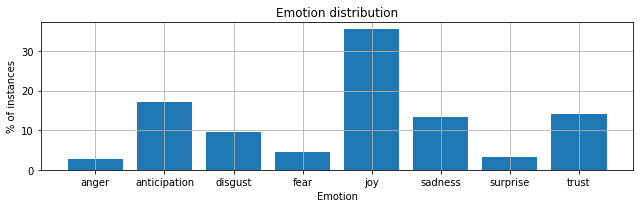

In [43]:
# load a pickle file
filename = "kaggle_data/train_tweets.pkl"
train_df = pd.read_pickle(filename)
print('Using ' + filename.split('/')[-1])

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(9,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.tight_layout()
plt.show()

The dataset is unbalanced, with more than 1/3 tweets are labeled as "joy".

## 2. Preprocessing, Feature engineering, and Handling imbalance

### 2.1 Methods that I've tried

#### 2.1.1 Try to handle imbalance by sampling subsets of data

Since there are a lot of samples available, I tried to sample data from the original dataset and use it as training data. In order to create a more balanced set, different categories are sampled with different probabilities, i.e., a majority class tweet will have a lower probability of being sampled; a minority class will have higher probability of being sampled. Use the balanced dataset when building the model.

#### 2.1.2  Try to handle imbalance by Random Over/Under sampling

Imbalance problem also can be alleviated by over sampling the minority classes or/and under sampling the majority classes. I used the "imblearn" package to over/under sample.

#### 2.1.3 Try to handle imbalance by assigning class weights

Assign class weight to different categories to counter imbalnce in LSTM model.

#### 2.1.4 Word Stemming and pos tagging, TF-IDF

Stem the tweets and get postags using nltk PorterStemmer and Stopwords from nltk corpus. Construct tfidf vectors with sklearn.

#### 2.1.5 Word vectors from pretrained model with Keras embeddings

Use pretrained word vectors such as "Wikipedia 2014 + Gigaword 5"(glove.6B.100d.txt), "Twitter"(glove.twitter.27B.100d.txt') to obtain word vectors for lstm models.

#### 2.1.6 Train the embedding layer with LSTM with Keras

Add an embedding layer before LSTM in the model. Train the embedding layer with LSTM and Dense layer.

### 2.2 Insights of different methods

To my surprise, after trying out Feature engineering and imbalance handling methods in 2.1, it turns out that for most of models that I've tried, Over/Under Sampling the training data does not increase the performance. While Over/Under Sampling does increase F1 score for minority classes, the tradeoff is that the model does not perform as well for majority classes. In all my submissions, Over/Under Sampling has worse F1 scores. Similarly, assinging class weights also has similar impact and results on f1 scores.

As for feature engineering, using the embedding layer in Keras gives the best results compared to pretrained word vectors and TF-IDF vectors. It may be that TF-IDF suffers from curse of dimensionality and pretrained word vectors are not fine tuned to suit our training data.

## 3. ML and NN Models

For TF-IDF vectors, I have tried linear SVM and Neural Network models. For word embeddings, I have tried LSTM/BiLSTM/CNN+LSTM.

## 4. Method and Model used for Kaggle submission

After trying out different methods, the best results are obtained by adding an embedding layer before the LSTM in the model(2.1.6).

The LSTM model used was modified from the Keras Examples github repository provided in Lab2. 

### 4.1 Development

#### 4.1.1 Preprocessing and Feature engineering
Use Keras tokenizer with filter to get rid of punctuations, and then use text_to_sequence to convert text to positive integer indices. Finally, Pad all integer sequences to the same length.

Also, use LabelEncoder to convert strings to one hot encoding.

In [14]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.layers import ReLU, Softmax
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

'''
Set the dimensions for padded sequence.
Set the batch size, larger for faster training.
Set max features for keras Tokenizer
'''
maxlen = 30
batch_size = 512
max_features = 20000

Using TensorFlow backend.


In [15]:
'''
load data and split
'''
filename = 'kaggle_data/train_tweets.pkl'
print('Using ' + filename.split('/')[-1])
df = pd.read_pickle(filename)

# Split data into train/test sets
train_df, test_df, _, _ = train_test_split(df, df['emotion'], test_size=0.2, random_state=0)

# Use the whole training dataset when training the model for submission
#train_df = df
#_ , test_df, _, _ = train_test_split(df, df['emotion'], test_size=0.2, random_state=0)

Using train_tweets.pkl


In [17]:
# Initializing tokenizer, getting rid of some punctuation
tokenizer_keras = Tokenizer(filters='"#%&()*+,-./:;<=>@[\]^`{|}~', num_words = max_features)
tokenizer_keras.fit_on_texts(train_df['text'])

# Convert text to integer sequences
x_train = tokenizer_keras.texts_to_sequences(train_df['text'])
x_test = tokenizer_keras.texts_to_sequences(test_df['text'])

print(x_train[0:2])
print(x_test[0:2])

[[773, 110, 439, 326, 3, 222, 1, 147, 5377], [397, 47, 1472, 6397, 6876, 6876, 136, 6876, 6876, 136, 1, 47, 84, 1174]]
[[757, 713, 5439, 2, 525, 35, 104, 51, 21, 169, 50, 147, 2, 219, 1, 29], [139, 62, 53, 237, 53, 556, 1201, 6, 3, 17, 13900, 1, 982, 1, 1]]


In [18]:
from sklearn.preprocessing import LabelEncoder
import keras

## deal with label (string -> one-hot)
y_train = train_df['emotion']
y_test = test_df['emotion']
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:4]:
 1326237            fear
836619     anticipation
247633            trust
546881              joy
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


In [19]:
#pad sequences to a fixed length
x_train = sequence.pad_sequences(x_train,  maxlen=maxlen, padding="post")
x_test = sequence.pad_sequences(x_test,  maxlen=maxlen, padding="post")

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (1164450, 30)
x_test shape: (291113, 30)


In [20]:
print(x_train[0:2])

[[ 773  110  439  326    3  222    1  147 5377    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [ 397   47 1472 6397 6876 6876  136 6876 6876  136    1   47   84 1174
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]]


In [21]:
print(x_test[0:2])

[[  757   713  5439     2   525    35   104    51    21   169    50   147
      2   219     1    29     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [  139    62    53   237    53   556  1201     6     3    17 13900     1
    982     1     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]]


The embedding layer of Keras takes positive integer sequences as input, with each integer representing a word. The embedding layer then turns positive integers (indices) into dense vectors of fixed size(word vectors).

#### 4.1.2 Build Model
The model consists of an embedding layer, a LSTM memory network, followed by a dense layer that transforms the last hidden state of LSTM to 8 dimensions. A softmax layer is used before the output to convert output of dense layer into probabilities ranging from 0~1.

In [22]:
print('Build model...')

# create a Sequential model 
model = Sequential()

# add the embedding layer, specify the embedding dimension
model.add(Embedding(max_features, 128))

# add LSTM layer, return the last hidden state only
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# add a dense layer with output dim as 8, one for each category
model.add(Dense(8, activation='relu'))

# Use softmax to convert output of dense layer to probability
model.add(Softmax())

print(model.summary())

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Build model...
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 1032      
_________________________________________________________________
softmax_1 (Softmax)          (None, 8)                 0         
Total params: 2,692,616
Trainable params: 2,692,616
Non-trainable params: 0
_________________________________________________________________
None


#### 4.1.2 Train Model

In [28]:
from keras.callbacks import CSVLogger
# Train the model on server with GPU,
# set the number of epochs.(5 for submission)

#csv_logger = CSVLogger('logs/train_lstm_jupyter.csv')
#print('Train...')
#history = model.fit(x_train, y_train,
#                    callbacks=[csv_logger],
#                    batch_size=batch_size,
#                    epochs=6,
#                    validation_data=(x_test, y_test))


### 4.2 Evaluation

In [ ]:
# After training, predict the test set and
# print out the classification report
y_pred = model.predict(x_test)

# Convert softmax output back to one hot
for i in range(y_pred.shape[0]):
    y_pred[i,np.argmax(y_pred[i,:])] = 1
    y_pred[i,0:np.argmax(y_pred[i,:])] = 0
    y_pred[i,np.argmax(y_pred[i,:])+1:] = 0
    
# Decode one hot to get category
y_test = list(label_decode(label_encoder, y_test))
y_pred = list(label_decode(label_encoder, y_pred))

# Print report
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=y_pred))

# save the model if needed
#model.save('models/model_name.h5')

   epoch       acc      loss   val_acc  val_loss
0      0  0.511714  1.356438  0.565035  1.205979
1      1  0.577644  1.171414  0.581808  1.157522
2      2  0.596183  1.117365  0.590094  1.135795
3      3  0.609567  1.078781  0.593110  1.127936
4      4  0.620627  1.047517  0.593701  1.128274
5      5  0.629848  1.020764  0.595229  1.132126


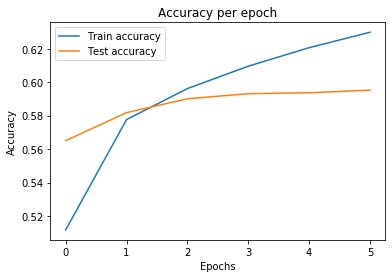

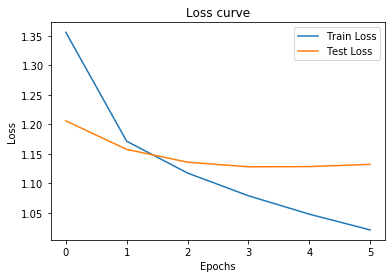

In [35]:
# Plot the curves

import matplotlib.pyplot as plt
training_log = pd.read_csv('logs/train_lstm.csv')
print(training_log)
plt.figure(0)
plt.title('Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(training_log.acc, label = 'Train accuracy')
plt.plot(training_log.val_acc, label = 'Test accuracy')
plt.legend()

plt.figure(1)
plt.title('Loss curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(training_log.loss, label = 'Train Loss')
plt.plot(training_log.val_loss, label = 'Test Loss')
plt.legend()

When training for 6(0~5) epochs, the Test loss stops decreasing after epoch 3(4) and starts increasing at epoch 5, there would be overfitting problems if training continues.

Below is the classification report from this model, which achieves avg f1 score 0.51. The model is trained for 6 epochs.

In [ ]:
"""
              precision    recall  f1-score   support

       anger       0.60      0.27      0.37      7976
anticipation       0.66      0.63      0.64     49669
     disgust       0.50      0.43      0.46     27765
        fear       0.68      0.43      0.52     12644
         joy       0.60      0.81      0.69    103403
     sadness       0.53      0.53      0.53     38847
    surprise       0.60      0.25      0.35      9707
       trust       0.60      0.40      0.48     41102

    accuracy                           0.60    291113
   macro avg       0.60      0.47      0.51    291113
weighted avg       0.60      0.60      0.58    291113
"""

## 5. Submission

The above preprocessing steps and model provides the best result among multiple models and methods. For the submission, I used the the whole training dataset and trained the model for 5(0~4) epochs, which is 1 epoch less than the above to avoid over fitting.

*I think 3 or 4 epochs would be better in the above case, but for submission, there are more training samples available, which could alleviate overfitting.

### 5.1 Load saved model and predict the public test set

In [ ]:
from keras.models import load_model
import pickle
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Set same dimensions as when training the model
maxlen = 30 # lstm
max_features = 20000

# load training data
filename = "kaggle_data/train_tweets.pkl"
model_name = 'model_name.h5' #lstm_model_train_tweets_all.h5
print('Using ' + filename.split('/')[-1])
train_df = pd.read_pickle(filename)
test_df = pd.read_pickle("kaggle_data/test_public_tweets.pkl")

# Initializing tokenizer, getting rid of some punctuation
tokenizer_keras = Tokenizer(filters='"#%&()*+,-./:;<=>@[\]^`{|}~', num_words = max_features)
tokenizer_keras.fit_on_texts(train_df['text'])

# Convert text to integer sequences
x_test = tokenizer_keras.texts_to_sequences(test_df['text'])

# Create label en/decoder and encode traing labels
from sklearn.preprocessing import LabelEncoder
import keras

y_train = train_df['emotion']
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)

# pad sequences for tesing data
x_test = sequence.pad_sequences(x_test,  maxlen=maxlen, padding="post")
print('x_test shape:', x_test.shape)

# load saved model
model = load_model('models/'+model_name)

# prediction on test set
y_pred = model.predict(x_test)
for i in range(y_pred.shape[0]):
    y_pred[i,np.argmax(y_pred[i,:])] = 1
    y_pred[i,0:np.argmax(y_pred[i,:])] = 0
    y_pred[i,np.argmax(y_pred[i,:])+1:] = 0

# decode the result
y_pred = list(label_decode(label_encoder, y_pred))

# write the result to csv file
df_submit = pd.DataFrame()
df_submit['id'] = test_df.id
df_submit['emotion'] = y_pred
df_submit.to_csv('submit/submit_' + model_name.split('.')[0] +'.csv', index=False)

A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.

## 6. Some other stuff that I've tried
I downloaded the nrc twitter lexicon, which contains the emotion/sentiment scores of words/hashtags in tweets, and calculated the emotion/sentiment scores for the tweets by adding up the scores of words/hashtags. The scores were used as training data for ML models. The results weren't satisfactory, achieving average f1 score 0.38 with Random forest model.